In [467]:
import shap
import pickle
import pandas as pd
import numpy as np
import tensorflow.keras.backend as K
from tensorflow import keras 
import tensorflow as tf
import scipy.stats as st
from numpy import mean
from numpy import std
from tensorflow.keras.metrics import binary_accuracy
from sklearn.metrics import roc_auc_score, fbeta_score, recall_score, precision_score, accuracy_score
import seaborn as sns
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import seaborn as sns; sns.set_theme()
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels as statsmodels
import statsmodels.stats.multitest as multitest
import copy
plt.style.use('seaborn-ticks')

In [3]:
#load train and test data

x_train = np.loadtxt('20210429_CRT_CCS_xtrain.txt')
x_test = np.loadtxt('20210429_CRT_CCS_xtest.txt')
y_train = np.loadtxt('20210429_CRT_CCS_ytrain.txt')
y_test = np.loadtxt('20210429_CRT_CCS_ytest.txt')
x_val = np.loadtxt('20210429_CRT_CCS_xval.txt')
y_val = np.loadtxt('20210429_CRT_CCS_yval.txt')


In [221]:
print(x_train)

[[ 2. 20. 20. ...  0. 15.  4.]
 [17. 18. 16. ...  7. 15.  4.]
 [16. 10. 20. ... 16.  9.  4.]
 ...
 [16.  6. 18. ...  8.  9.  4.]
 [11.  8.  3. ...  2.  3. 15.]
 [10.  2.  5. ... 16. 13.  9.]]


In [222]:
print(y_train)

[383.9534014  341.2742951  322.6715301  ... 317.9521273  372.11204427
 357.52811655]


In [225]:
x_all = np.concatenate((x_train, x_test, x_val))
#x_all = x_train + x_test + x_val
y_all = np.concatenate((y_train, y_test, y_val))
#y_all = y_train + y_test + y_val
np.savetxt('20210621_CCS_xall.txt', x_all)
np.savetxt('20210621_CCS_yall.txt', y_all)

In [228]:
from sklearn.model_selection import train_test_split

x_shaps, x_base, y_shaps, y_base = train_test_split(x_all, y_all, test_size=0.30, random_state=42)

np.savetxt('20210621_CCS_xshaps.txt', x_shaps)
np.savetxt('20210621_CCS_yshaps.txt', y_shaps)

np.savetxt('20210621_CCS_xbase.txt', x_base)
np.savetxt('20210621_CCS_ybase.txt', y_base)

In [227]:
print(len(y_all))
print(len(y_train)+len(y_test)+len(y_val))

45990
45990


In [ ]:
#load model
from tensorflow.compat.v1.keras.backend import get_session
tf.compat.v1.disable_v2_behavior()
mload = tf.keras.models.load_model('20210603_CCS_200epoch.model')

# #make predictions for whole dataset

allpredictions = mload.predict(np.asarray(x_test))

In [ ]:
#Pick subset of data to use

# Full Dataset
x_testall = x_test
x_testsubset = x_test

datatrain = x_train


In [ ]:
# Use training data as background, average it into 100 points
x_trainmeans = shap.kmeans(np.asarray(datatrain), 100)
explainer = shap.KernelExplainer(mload.predict, x_trainmeans)


In [ ]:
#calculate shap values - Around 17h
shap_values = explainer.shap_values(np.asarray(x_testsubset))
#save shap_values as temp file
with open("shapvaluestemp.pkl","wb") as f:
    pickle.dump(shap_values,f)

In [ ]:
# save shap_values, enter file name
with open("shapvaluesCCSall.pkl","wb") as f:
    pickle.dump(shap_values,f)



In [758]:
###Extract from file
#with open("shapvaluesCCS.pkl","rb") as f:
with open("shapvaluesCCS_SGD.pkl","rb") as f:
    shap_valuesall = pickle.load(f)
    
shap_values = shap_valuesall


In [5]:
import pandas as pd
import seaborn as sns; sns.set_theme()
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [8]:
len(x_test)

4600

In [15]:
y_test

array([426.80462365, 338.4297709 , 340.4088373 , ..., 353.2415585 ,
       361.0859204 , 334.0286007 ])

In [17]:
x_test[0]
len(x_test)

4600

In [25]:
x_test

array([[ 7., 10.,  2., ..., 10., 15.,  4.],
       [10.,  5., 12., ..., 15.,  4.,  4.],
       [ 9.,  3., 14., ...,  0., 14.,  4.],
       ...,
       [20., 17., 10., ..., 15.,  4.,  4.],
       [ 6.,  7., 13., ..., 17., 14.,  9.],
       [ 5.,  3., 16., ..., 15.,  4.,  4.]])

In [29]:
shap_values

[array([[ 2.36712714e+01, -2.56203561e+00, -5.31980607e+00, ...,
          1.30002845e+00,  2.66413574e+01, -1.52519721e+01],
        [-1.83041559e+00, -1.67266715e-01, -6.85939680e+00, ...,
          1.00755318e+01, -1.55710548e+01, -1.99016723e+01],
        [-1.00473765e+00, -3.17952339e+00, -8.64847657e-01, ...,
         -9.14828036e+00,  6.33186027e-01, -1.75131861e+01],
        ...,
        [-4.60569193e-03, -5.86028407e+00, -2.81894339e-01, ...,
          9.74227102e+00, -1.63829098e+01, -2.16130044e+01],
        [-1.40084281e+01,  3.91687254e+00, -6.30581650e+00, ...,
         -6.13087247e+00, -8.67970213e-01,  9.00180609e+00],
        [ 2.50297293e+00, -2.60039952e+00, -7.02452838e+00, ...,
          9.27822529e+00, -1.52271868e+01, -2.12101060e+01]])]

In [41]:
len(shap_values)

1

In [42]:
list(zip(x_test, shap_values[0], y_test))

[(array([ 7., 10.,  2., 15., 13., 18.,  5., 10., 15.,  4.]),
  array([ 23.67127138,  -2.56203561,  -5.31980607,  16.0731339 ,
          -6.10508248,  -5.21163094,  -0.93765125,   1.30002845,
          26.64135744, -15.25197213]),
  426.80462364999994),
 (array([10.,  5., 12.,  3.,  7.,  8.,  3., 15.,  4.,  4.]),
  array([-1.83041559e+00, -1.67266715e-01, -6.85939680e+00, -3.84251028e-01,
          6.32493696e+00, -1.95861768e+00, -1.94756778e-02,  1.00755318e+01,
         -1.55710548e+01, -1.99016723e+01]),
  338.4297709),
 (array([ 9.,  3., 14.,  0., 10., 14., 10.,  0., 14.,  4.]),
  array([ -1.00473765,  -3.17952339,  -0.86484766,  -8.78296197,
           0.51668671,  -1.95531665,  -1.33077439,  -9.14828036,
           0.63318603, -17.51318614]),
  340.4088373),
 (array([ 9.,  3., 14.,  0., 10., 14., 10.,  0., 14.,  9.]),
  array([-1.58881949, -3.28636956, -0.7793676 , -9.30446063,  0.36623204,
         -2.16821336, -1.84709781, -9.70145804, -0.17246506,  8.31820639]),
  374.3144044)

In [70]:
len(x_train)/21*2

3155.6190476190477

In [71]:
len(x_val)/21*2

786.2857142857143

In [104]:
len(x_test)

4600

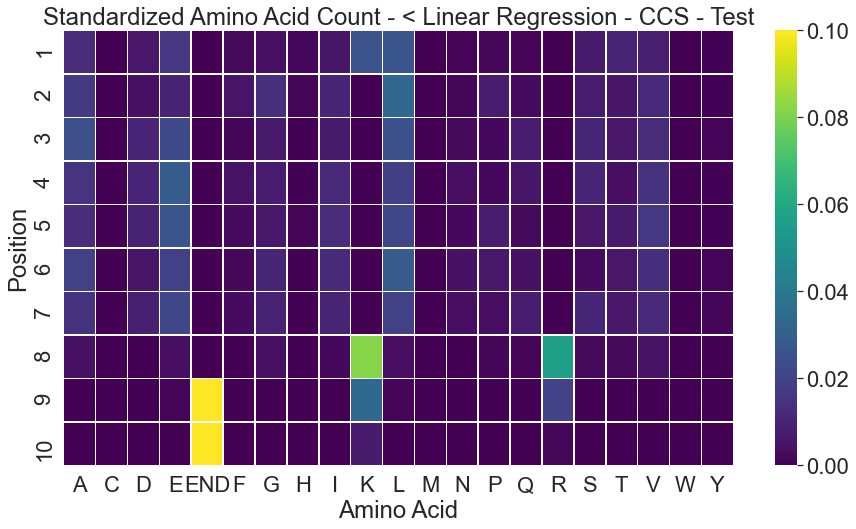

In [125]:
df = pd.DataFrame(list(zip(x_test, shap_values[0], y_test)),
               columns =['xtest', 'shap','y_test'])

shapsum = []
for value in shap_values:
    shapsum.append(sum(value))
    
#df['shapsum'] = shapsum

df = df.sort_values(by=['y_test'], ascending = False)

df = pd.DataFrame(list(zip(x_test,  y_test)),
               columns =['xtest', 'y_test'])

df = df.sort_values(by=['y_test'], ascending = True)

#HEATMAP 
heatmap = []
i = 0
while i<10:
    heatmap.append([])
    j = 0
    while j < 21:
        heatmap[i].append(0)
        j+=1
    i+=1

i = 0
while i < len(np.asarray(df['xtest'])[0:214]):
    j=0
    while j < len(np.asarray(df['xtest'])[0:214][i]):
        heatmap[j][int(np.asarray(df['xtest'])[0:214][i][j])]+=1
        
        j+=1
    i+=1 

    
    
    
heatmap = heatmap*weight
heatmap = heatmap/heatmap.max()

x_axis_labels = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'] # labels for x-axis
y_axis_labels = ['1','2','3','4','5','6','7','8','9','10']
sns.set(font_scale=2)

# figure size in inches
rcParams['figure.figsize'] = 15,8

ax = sns.heatmap(heatmap,xticklabels=x_axis_labels, yticklabels=y_axis_labels, vmax = .1, linewidths=.5, cmap="viridis")


ax.set(xlabel='Amino Acid', ylabel='Position', title='Standardized Amino Acid Count - < Linear Regression - CCS - Test')
ax.figure.savefig('picks-peptidesheatmap-CCS-test.png')
ax.figure.savefig('picks-peptidesheatmap-CCS-test.svg')
plt.show()

<AxesSubplot:>

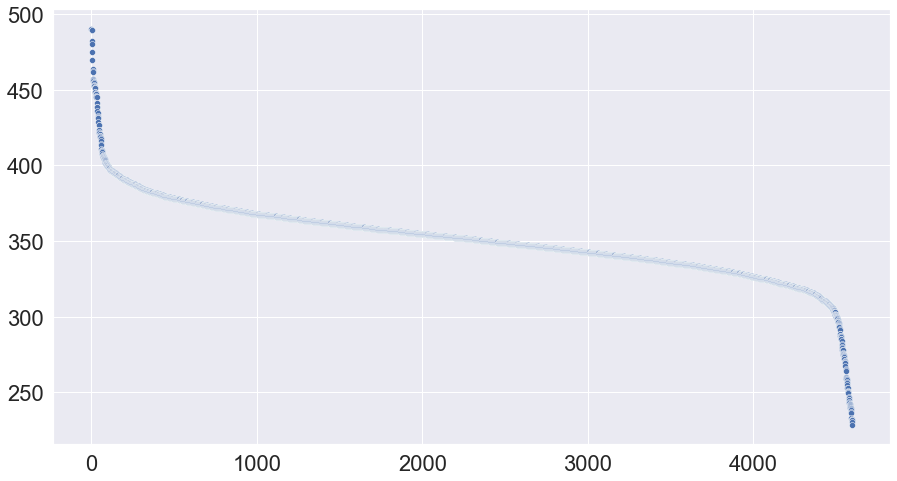

In [107]:
df = df.sort_values(by=['y_test'], ascending = False)
sns.scatterplot(y=np.array(df['y_test'])[0:], x = [*range(0,len(np.array(df['y_test'])[0:]))])

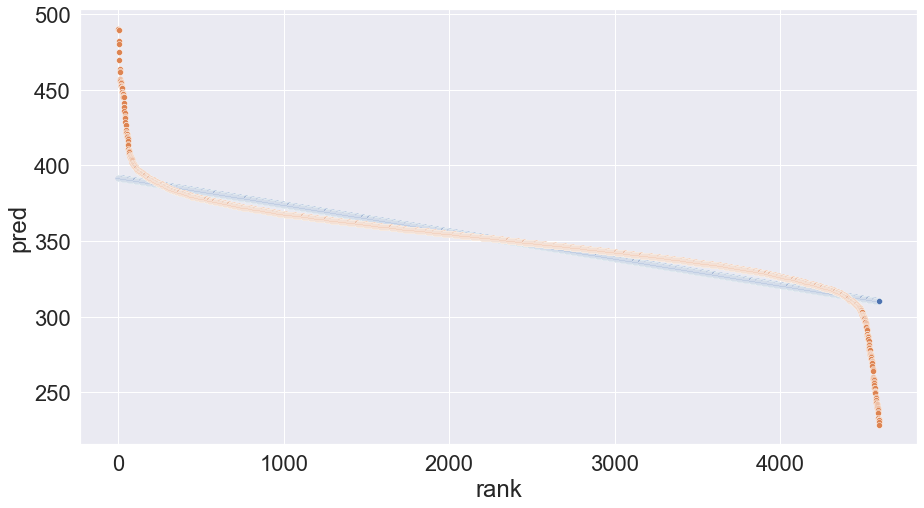

In [121]:
dfsort = df.sort_values(by=['y_test'], ascending = False)

count = [*range(1, len(y_test)+1, 1)]
dfsort['rank'] = count



import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('y_test ~ rank', data=dfsort)
model = model.fit()
m, b = model.params

predict = model.predict()

dfsort['pred'] = predict
dfpicks =dfsort.loc[dfsort['y_test'] < np.mean(dfsort['y_test']).tolist()]
dfpicks =dfpicks.loc[dfpicks['pred'] >= dfpicks['y_test']]

sns.scatterplot(data = dfsort, x='rank', y="pred")
sns.scatterplot(data = dfsort, x='rank', y="y_test")
#plt.yscale('log')

dfpicks = dfpicks.sort_values('y_test' , ascending = False)

#dfpicks.to_csv("A1101_.csv")

In [122]:
len(dfpicks)

214

In [103]:
weight = np.array(heatmap)/33134
df = pd.DataFrame(weight, columns = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'])
df.to_csv("CCS_peptide_weight.csv")

In [53]:
weight

array([[5.28260870e-02, 6.73913043e-03, 5.60869565e-02, 7.82608696e-02,
        0.00000000e+00, 5.84782609e-02, 3.15217391e-02, 4.73913043e-02,
        6.08695652e-02, 1.40869565e-01, 1.23913043e-01, 1.39130435e-02,
        3.06521739e-02, 3.78260870e-02, 2.34782609e-02, 2.82608696e-02,
        4.84782609e-02, 5.41304348e-02, 6.39130435e-02, 4.13043478e-03,
        3.82608696e-02],
       [6.19565217e-02, 1.41304348e-02, 5.41304348e-02, 9.04347826e-02,
        0.00000000e+00, 5.86956522e-02, 5.28260870e-02, 4.00000000e-02,
        6.95652174e-02, 7.82608696e-03, 1.45000000e-01, 1.17391304e-02,
        3.47826087e-02, 5.56521739e-02, 5.60869565e-02, 1.76086957e-02,
        5.82608696e-02, 4.69565217e-02, 7.30434783e-02, 8.69565217e-03,
        4.26086957e-02],
       [7.63043478e-02, 1.06521739e-02, 7.34782609e-02, 1.21086957e-01,
        0.00000000e+00, 4.95652174e-02, 4.60869565e-02, 3.58695652e-02,
        6.43478261e-02, 1.95652174e-03, 1.25869565e-01, 7.82608696e-03,
        4.4347

In [ ]:
# transform the indexes to peptides with positions appended

char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

x_testpep = []
temppep = []
i = 0

while i < len(x_testsubset):
    j = 0
    while j < len(x_test[i]):
        temppep.append(str(char_index[int(x_testsubset[i][j])] + " " + str(j+1)))
        j+=1
    x_testpep.append(temppep)
    temppep = []
    i+=1


In [ ]:
#split shap values and peptides into 8,9,10mers
print(x_testpep[0])
print(shap_values[0][0])

x_test8mers = []
x_test9mers = []
x_test10mers = []

x_testpep8mers = []
x_testpep9mers = []
x_testpep10mers = []

shap_values8mers = []
shap_values9mers = []
shap_values10mers = []

shap_values8mers.append([])
shap_values9mers.append([])
shap_values10mers.append([])

i = 0
while i < len(x_testpep):
    
    if 'END' in x_testpep[i][9]:
        if 'END' in x_testpep[i][8]:
                x_testpep8mers.append(x_testpep[i])
                shap_values8mers[0].append(shap_values[0][i])
                x_test8mers.append(x_test[i])
        else:
            x_testpep9mers.append(x_testpep[i])
            shap_values9mers[0].append(shap_values[0][i])
            x_test9mers.append(x_test[i])
    else:
        x_testpep10mers.append(x_testpep[i])
        shap_values10mers[0].append(shap_values[0][i])
        x_test10mers.append(x_test[i])
    i+=1
    
print(len(x_testpep))
print(len(x_testpep8mers)+len(x_testpep9mers)+len(x_testpep10mers))
print(shap_values8mers[0][0])

In [774]:
upper

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.68235294, 0.78039216, 0.90980392, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [1.        , 0.73333333, 0.47058824, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.59607843, 0.8745098 , 0.54117647, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [1.        , 0.59607843, 0.58823529, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.77254902, 0.69019608, 0.83529412, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.76862745, 0.61176471, 0.58039216, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.96862745, 0.71372549, 0.82352941, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.78039216, 0.78039216, 0.78039216, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.85882353, 0.85882353,

In [773]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# create colormap by taking tab20 premade colormap and adding black to the bottom
upper = mpl.cm.tab20(np.arange(20))
lower = [0,0,0,1]
cmap1 = np.vstack(( lower, upper))

# convert to matplotlib colormap
cmap1 = mpl.colors.ListedColormap(cmap1, name='myColorMap', N=cmap1.shape[0])


In [775]:
#Create Dependance plots for each of the positions shap.dependence_plot(a, shap_valuestmp[b], x_testadj, feature_names=['pos1', 'pos2', 'pos3','pos4', 'pos5', 'pos6','pos7', 'pos8', 'pos9','pos10'],  cmap=cmap1,show = False, x_jitter=.1,  interaction_index=c)
# a = position looking at
# b = allele looking at 
# c = position looking at interaction of i.e. colorbar
shap_values = shap_valuesall
x_test = x_testall
#Modify shap_values and data arrays to fix dependence_plot rounding on colorbar
shap_valuestmp = []

i = 0
while i<len(shap_values):
    j=0
    tmppeps = []
    while j < len (shap_values[i]):
        k=0
        tmpposs = []
        while k < len (shap_values[i][j]):
            tmpposs.append(shap_values[i][j][k])
            k+=1
        tmppeps.append(tmpposs)
        j+=1
    f=0
    #add 2000 blank shap values to make color bar right
    while f<2000:
        tmppeps.append([0,0,0,0,0,0,0,0,0,0])
        f+=1

    shap_valuestmp.append(tmppeps)
    
    i+=1
    
shap_valuestmp = np.array(shap_valuestmp)
i = 0
x_testadj = []

while i < len(x_test):
    tmp = []
    for value in x_test[i]:
        tmp.append(value)
    x_testadj.append(tmp)
    i+=1
i = 0
while i<1000:    
    x_testadj.append([-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5])
    i+=1
i = 0
while i<1000:
    x_testadj.append([20.5,20.5,20.5,20.5,20.5,20.5,20.5,20.5,20.5,20.5])
    
    i+=1
x_testadj = np.array(x_testadj)

y = [-40,-30,-20,-10,0,10,20,30,40,50]
yt = [-40,-30,-20,-10,0,10,20,30,40,50]
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
xt = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


pos = 0

#set to allele index
allele = 0

#set to 'static', 'preceding', 'following'
compareto = 'static'
compared = 2


while pos < 10:
    
    if compareto == 'preceding':
        if pos == 0:
            compared = 9
        else:
            compared = pos-1
            
    if compareto == 'following':
        if pos == 9:
            compared = 0
        else:
            compared = pos+1
    if pos != compared:
        
        
    
        shap.dependence_plot(pos, shap_valuestmp[allele], x_testadj, feature_names=['pos1', 'pos2', 'pos3','pos4', 'pos5', 'pos6','pos7', 'pos8', 'pos9','pos10'],  cmap=cmap1, show = False, x_jitter=.1,  interaction_index=compared)
        plt.yticks(y,yt)
        plt.xticks(x,xt)

        fig = plt.gcf()
        fig.set_size_inches(10,10)
        #plt.set_clim(0,1)
        #plt.figure(figsize=(20, 10))
        cbs = []

        for ax in fig.axes:
            cbs.extend(ax.findobj(lambda obj: hasattr(obj, "colorbar") and obj.colorbar))

        colorb = cbs[0].colorbar
        #colorb.set_clim(-1, 21)
        z = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
        zt = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

        colorb.set_ticks(z)
        colorb.set_ticklabels(zt)
        #ax = plt.gca()
        #imshowobj = plt.imshow(x_testadj)
        #cbarobj = plt.colorbar(imshowobj, cmap=cmap1, ax= fig.axes[-1])
        #imshowobj.set_clim(0,20)

        #plt.savefig('dependenceplotnew' + str(pos) + '.svg', bbox_inches="tight", format = 'svg', dpi=1000)
        plt.show()
    
    pos+=1





NameError: name 'x_testall' is not defined

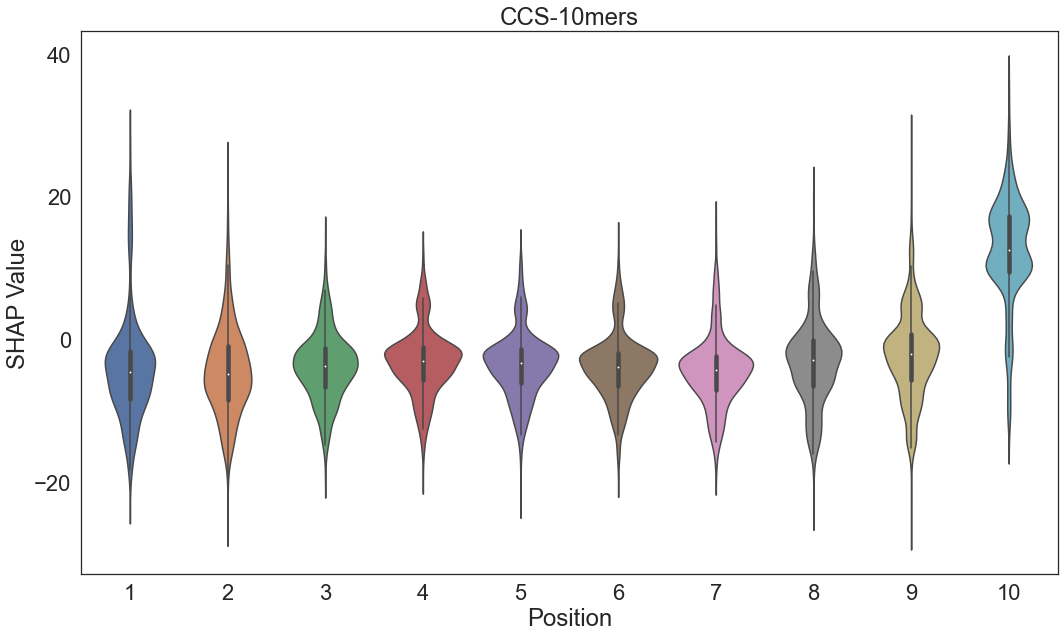

In [966]:
#shap values by position
#shap_values = shap_valuesall
#x_test = x_testall
positionalshaps = [[],[],[],[],[],[],[],[],[],[]]
i = 0
sns.set_style("white")
while i < len(shap_values[0]):
    j = 0
    while j < len(shap_values[0][i]):
        positionalshaps[j].append(shap_values[0][i][j])
        j+=1
    i+=1
    
sns.violinplot(data=positionalshaps)
fig = plt.gcf()
fig.set_size_inches(17.5,10)
plt.xlabel("Position")
plt.ylabel("SHAP Value")
plt.title("CCS-10mers")
sns.set(font_scale = 4.5)
#plt.yticks(y,yt)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1" ,"2" ,"3","4","5","6","7","8","9","10"])
plt.savefig("positionSHAPrangeCCS_10mers.svg")
plt.show()

In [ ]:
#shap values by amino acid
shap_values = shap_valuesall
x_test = x_testall
char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
aminoacidshaps = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
i=0
while i < len(shap_values[0]):
    j = 0
    while j < len(shap_values[0][i]):
        aminoacidshaps[int(x_test[i][j])].append(shap_values[0][i][j])
        j+=1
    i+=1
xt = ['A','C','D','E','x','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
sns.set_style("white")
sns.violinplot(data=aminoacidshaps)
plt.yticks(y,yt)
plt.xticks(x,xt)
plt.xlabel("Amino Acid")
plt.ylabel("SHAP Value")
plt.title("CCS")
sns.set(font_scale = 4.5)

fig = plt.gcf()
fig.set_size_inches(17.5,10)
plt.savefig("aminoacidSHAPrangeCCS10mers.svg")
plt.show()

In [127]:
x_test

array([[ 7., 10.,  2., ..., 10., 15.,  4.],
       [10.,  5., 12., ..., 15.,  4.,  4.],
       [ 9.,  3., 14., ...,  0., 14.,  4.],
       ...,
       [20., 17., 10., ..., 15.,  4.,  4.],
       [ 6.,  7., 13., ..., 17., 14.,  9.],
       [ 5.,  3., 16., ..., 15.,  4.,  4.]])

In [912]:
x_test = np.loadtxt('20210429_CRT_CCS_xtest.txt')
shap_values = shap_valuesall
#split shaps into 8, 9, and 10 mers
eightmers = [[],[[]]]
ninemers = [[],[[]]]
tenmers = [[],[[]]]

i = 0
while i < len(x_test):
    if x_test[i][9]==4:
        if x_test[i][8]==4:
            eightmers[0].append(x_test[i])
            eightmers[1][0].append(shap_values[0][i])
        else:
            ninemers[0].append(x_test[i])
            ninemers[1][0].append(shap_values[0][i])
    else:
        tenmers[0].append(x_test[i])
        tenmers[1][0].append(shap_values[0][i])
    i+=1


In [898]:
ninemers

[[array([ 7., 10.,  2., 15., 13., 18.,  5., 10., 15.,  4.]),
  array([ 9.,  3., 14.,  0., 10., 14., 10.,  0., 14.,  4.]),
  array([14., 14., 14., 16.,  3., 11.,  5., 13.,  9.,  4.]),
  array([ 7., 10., 12., 16.,  6.,  6.,  3., 10., 15.,  4.]),
  array([ 9.,  7., 10.,  0.,  7., 18., 10., 16.,  3.,  4.]),
  array([12.,  8., 17., 10.,  8.,  6.,  8., 12., 15.,  4.]),
  array([ 5.,  3., 14.,  8., 13., 14.,  8., 10.,  9.,  4.]),
  array([ 8.,  6., 10., 14., 18.,  0.,  0., 18.,  9.,  4.]),
  array([14., 14., 10.,  7., 17., 11.,  0., 14.,  9.,  4.]),
  array([12.,  1., 10.,  2., 13.,  5., 17., 16., 15.,  4.]),
  array([ 3., 18.,  3.,  0.,  0., 14.,  6., 18.,  9.,  4.]),
  array([17.,  3., 12.,  2.,  7.,  8., 12., 10.,  9.,  4.]),
  array([ 3.,  3., 20.,  3.,  0.,  7., 14.,  2., 15.,  4.]),
  array([18.,  3., 14.,  8.,  8., 18., 18., 13., 15.,  4.]),
  array([16., 19., 12.,  3., 17., 10., 17., 16., 15.,  4.]),
  array([ 9.,  5.,  8.,  2.,  2., 17., 10., 16.,  2.,  4.]),
  array([ 2.,  3., 18., 

In [ ]:
x_test = np.loadtxt('20210429_CRT_CCS_xtest.txt')

In [967]:
#dependence of termini
###Extract from file
with open("shapvaluesCCS.pkl","rb") as f:
    shap_valuesall = pickle.load(f)
    
x_test = tenmers[0]#shap_valuesall

shap_values = tenmers[1][0]#np.loadtxt('20210429_CRT_CCS_xtest.txt')




In [968]:
#dependence analysis without ends

shap_values = shap_valuesall
if len(shap_values)>1:
    shap_values = [shap_values]
x_test = np.loadtxt('20210429_CRT_CCS_xtest.txt')

In [969]:
if len(shap_values)>1:
    shap_values = [shap_values]
#dependence analysis without ends

#shap_values = shap_valuesall
#x_test = np.loadtxt('20210429_CRT_CCS_xtest.txt')


aa = []

i = 0
j = 0
while i < 10:
    aa.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    i+=1

i = 0
j = 0


char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


i=0
j=0
k=0


#through the positions
while (i < len(shap_values[0][0])):
    j=0
    shappostmp = []
    #through the values
    while (j < 21):
        #through the list
        k = 0
        while (k < len(shap_values[0])):
            #place each shap value corresponding to an amino acid into a new array
            if j == x_test[k][i]:
                aa[i][j].append(shap_values[0][k][i])
                
            k+=1
        j+=1
    i+=1
    
i = 0
j = 0


aadep = []

i = 0
j = 0
while i < 10:
    aadep.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    i+=1

i = 0
j = 0
temp = []
while i < len(shap_values[0][0]):
    temp.append(copy.deepcopy(aadep))
    i+=1
i = 0
deparray = []

while i < 21:
    deparray.append(copy.deepcopy(temp))
    i+=1
    
    
    
compaadep = []

i = 0
j = 0
while i < 10:
    compaadep.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    i+=1

i = 0
j = 0
comptemp = []
while i < len(shap_values[0][0]):
    comptemp.append(copy.deepcopy(compaadep))
    i+=1
i = 0
compdeparray = []

while i < 21:
    compdeparray.append(copy.deepcopy(comptemp))
    i+=1
    


char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


i=0
j=0
k=0
a = 0
b = 0
#through the amino acids
while (a<21):
    b=0
    if (a != 4):
        while (b < len(shap_values[0][0])):
            #through the positions
            i=0
            while (i < len(shap_values[0][0])):
                j=0

                #through the values
                if (b != i):
                    #print("b!=i")
                    #print(b)
                    while (j < 21):
                        if (j!= 4):
                            #through the list
                            k = 0
                            while (k < len(shap_values[0])):
                                #place each shap value corresponding to an amino acid into a new array
                                if j == x_test[k][i] and x_test[k][b] == a:
                                    deparray[a][b][i][j].append(shap_values[0][k][i])
                                if j == x_test[k][i] and x_test[k][b] != a:
                                    compdeparray[a][b][i][j].append(shap_values[0][k][i])

                                k+=1
                        j+=1
                i+=1
            b+=1
    a+=1

    i = 0
j = 0
#Remove extra zeros
i=0
j=0
k=0
a = 0
b = 0
while (a<len(deparray)):
    b=0
    while (b < len (deparray[a])):
        i=0
        while(i < len(deparray[a][b])):
            j=0
            while(j < len(deparray[a][b][i])):
                
                if len(deparray[a][b][i][j])>1:
                    
                    deparray[a][b][i][j] = deparray[a][b][i][j][1:]
                
                if len(compdeparray[a][b][i][j])>1:
                    
                    compdeparray[a][b][i][j] = compdeparray[a][b][i][j][1:]
                
                    
                j+=1
            i+=1
        b+=1
    a+=1

In [458]:
#dependence analysis

shap_values = tenmers[1]
x_test = tenmers[0]
#x_test = np.loadtxt('20210429_CRT_CCS_xtest.txt')
aa = []

i = 0
j = 0
while i < 10:
    aa.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    i+=1

i = 0
j = 0


char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


i=0
j=0
k=0


#through the positions
while (i < len(shap_values[0][0])):
    j=0
    shappostmp = []
    #through the values
    while (j < 21):
        #through the list
        k = 0
        while (k < len(shap_values[0])):
            #place each shap value corresponding to an amino acid into a new array
            if j == x_test[k][i]:
                aa[i][j].append(shap_values[0][k][i])
                
            k+=1
        j+=1
    i+=1
    
i = 0
j = 0


aadep = []

i = 0
j = 0
while i < 10:
    aadep.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    i+=1

i = 0
j = 0
temp = []
while i < len(shap_values[0][0]):
    temp.append(copy.deepcopy(aadep))
    i+=1
i = 0
deparray = []

while i < 21:
    deparray.append(copy.deepcopy(temp))
    i+=1
    
    
    
compaadep = []

i = 0
j = 0
while i < 10:
    compaadep.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    i+=1

i = 0
j = 0
comptemp = []
while i < len(shap_values[0][0]):
    comptemp.append(copy.deepcopy(compaadep))
    i+=1
i = 0
compdeparray = []

while i < 21:
    compdeparray.append(copy.deepcopy(comptemp))
    i+=1
    


char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


i=0
j=0
k=0
a = 0
b = 0
#through the amino acids
while (a<21):
    b=0
    while (b < len(shap_values[0][0])):
        #through the positions
        i=0
        while (i < len(shap_values[0][0])):
            j=0
            
            #through the values
            if (b != i):
                #print("b!=i")
                #print(b)
                while (j < 21):
                    #through the list
                    k = 0
                    while (k < len(shap_values[0])):
                        #place each shap value corresponding to an amino acid into a new array
                        if j == x_test[k][i] and x_test[k][b] == a:
                            deparray[a][b][i][j].append(shap_values[0][k][i])
                        if j == x_test[k][i] and x_test[k][b] != a:
                            compdeparray[a][b][i][j].append(shap_values[0][k][i])
                        
                        k+=1
                    j+=1
            i+=1
        b+=1
    a+=1

    i = 0
j = 0
#Remove extra zeros
i=0
j=0
k=0
a = 0
b = 0
while (a<len(deparray)):
    b=0
    while (b < len (deparray[a])):
        i=0
        while(i < len(deparray[a][b])):
            j=0
            while(j < len(deparray[a][b][i])):
                
                if len(deparray[a][b][i][j])>1:
                    
                    deparray[a][b][i][j] = deparray[a][b][i][j][1:]
                
                if len(compdeparray[a][b][i][j])>1:
                    
                    compdeparray[a][b][i][j] = compdeparray[a][b][i][j][1:]
                
                    
                j+=1
            i+=1
        b+=1
    a+=1

In [970]:
outputarray = []
char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
a = 0
b = 0
c = 0
d = 0
e = 0

while a < len(deparray):
    b = 0
    while b < len(deparray[a]):
        c = 0
        while c<len(deparray[a][b]):
            d = 0
            while d < len(deparray[a][b][c]):
                try:
                    stat,test = st.mannwhitneyu(deparray[a][b][c][d][1:], compdeparray[a][b][c][d][1:])
                except ValueError:
                    stat = 1
                    test = 1
                if test<1 and test>0:
                    
                    outputarray.append([test,char_index[a],b+1,c+1,char_index[d],
                                        len(deparray[a][b][c][d][1:]),
                                        len(compdeparray[a][b][c][d][1:]),
                                        np.mean(deparray[a][b][c][d][1:]),
                                        np.mean(compdeparray[a][b][c][d][1:]), 
                                        abs(np.mean(compdeparray[a][b][c][d][1:])-np.mean(deparray[a][b][c][d][1:])),
                                        np.mean(deparray[a][b][c][d][1:])-np.mean(compdeparray[a][b][c][d][1:])])
                    e+=1
                d+=1
            c+=1
        b+=1
    a+=1

outputdf = pd.DataFrame(outputarray, columns = ["mw pvalue", "compared amino acid", "compared position", "position", "amino acid","compared size","total size", "compared mean", "total mean", "abs difference", "difference"]) 
corrmwtest = multitest.multipletests(outputdf['mw pvalue'].tolist(), alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
outputdf.insert(1, "corr mw pvalue", corrmwtest[1])

outputdf = outputdf.sort_values(by='corr mw pvalue', ascending=True)

divide by zero encountered in double_scalars


In [971]:
posdiff = abs(outputdf['position']-outputdf['compared position'])
i = 0
while i < len(posdiff):
    if outputdf['amino acid'][i] == "END" or outputdf['compared amino acid'][i] == "END":
        posdiff[i] = -1
    i+=1

outputdf['distance']=posdiff

#outputdf['distance_end']=['-1' if x=="End" else outputdf['distance_end'] for x in outputdf['compared amino acid']]
outputdf['Close'] = ["End" if x <= -1 else 'Neighbor' if x==1 else 'Near' if 2<=x<7 else 'Far' for x in outputdf['distance']]



outputdf['compared amino acid category'] = ['Positive' if (x== "R" or x == "H" or x == "K")  
                                            else 'Negative' if (x== "D" or x == "E") 
                                            else 'Polar' if (x== "S" or x == "T" or x == "N" or x == "Q" or x == "Y") 
                                            else 'End' if (x=='END')  
                                            else 'Hydrophobic' for x in outputdf['compared amino acid']]

outputdf['amino acid category'] = ['Positive' if (x== "R" or x == "H" or x == "K")  
                                   else 'Negative' if (x== "D" or x == "E") 
                                   else 'Polar' if (x== "S" or x == "T" or x == "N" or x == "Q" or x == "Y") 
                                   else 'End' if (x=='END')  
                                   else 'Hydrophobic' for x in outputdf['amino acid']]

outputdf['amino acid size'] = ['Very Large' if (x== "F" or x == "W" or x == "Y") 
                               else 'Large' if (x== "I" or x == "L" or x=="M" or x == "K" or x =="R") 
                               else 'Medium' if (x== "V" or x == "H" or x == "E" or x == "Q") 
                               else 'Small' if (x=='C' or x=='P' or x=='T' or x == 'D' or x == 'N') 
                               else 'End' if (x=="END")  else 'Very Small' for x in outputdf['amino acid']]

outputdf['compared amino acid size'] = ['Very Large' if (x== "F" or x == "W" or x == "Y")  
                                        else 'Large' if (x== "I" or x == "L" or x=="M"or x == "K" or x =="R") 
                                        else 'Medium' if (x== "V" or x == "H" or x == "E" or x == "Q") 
                                        else 'Small' if (x=='C' or x=='P' or x=='T'or x == 'D' or x == 'N') 
                                        else 'End' if (x=="END")  else 'Very Small' for x in outputdf['compared amino acid']]


interactiontype = []
interactiontypecategory = []
i = 0
while i < len(outputdf['amino acid category'].tolist()):
    if outputdf['amino acid category'].tolist()[i] == 'Positive':
        if outputdf['compared amino acid category'].tolist()[i] == 'Positive':
            interactiontype.append('Charge Repulsion')
            interactiontypecategory.append("Repulsive")
        elif outputdf['compared amino acid category'].tolist()[i] == 'Negative':
            interactiontype.append('Charge Attraction')
            interactiontypecategory.append("Attraction")
        elif outputdf['compared amino acid category'].tolist()[i] == 'Polar':
            interactiontype.append('Polar')
            interactiontypecategory.append("Attraction")
        elif outputdf['compared amino acid category'].tolist()[i] == 'End':
            interactiontype.append('zEnd')
            interactiontypecategory.append("zEnd")
        else:
            interactiontype.append('Other')
            interactiontypecategory.append("Repulsive")
    elif outputdf['amino acid category'].tolist()[i] == 'Negative':
        if outputdf['compared amino acid category'].tolist()[i] == 'Positive':
            interactiontype.append('Charge Attraction')
            interactiontypecategory.append("Attraction")
        elif outputdf['compared amino acid category'].tolist()[i] == 'Negative':
            interactiontype.append('Charge Repulsion')
            interactiontypecategory.append("Repulsive")
        elif outputdf['compared amino acid category'].tolist()[i] == 'Polar':
            interactiontype.append('Polar')
            interactiontypecategory.append("Attraction")
        elif outputdf['compared amino acid category'].tolist()[i] == 'End':
            interactiontype.append('zEnd')
            interactiontypecategory.append("zEnd")
        else:
            interactiontype.append('Other')
            interactiontypecategory.append("Repulsive")
    elif outputdf['amino acid category'].tolist()[i] == 'Polar':
        if outputdf['compared amino acid category'].tolist()[i] == 'Positive':
            interactiontype.append('Polar')
            interactiontypecategory.append("Attraction")
        elif outputdf['compared amino acid category'].tolist()[i] == 'Negative':
            interactiontype.append('Polar')
            interactiontypecategory.append("Attraction")
        elif outputdf['compared amino acid category'].tolist()[i] == 'Polar':
            interactiontype.append('Polar')
            interactiontypecategory.append("Attraction")
        elif outputdf['compared amino acid category'].tolist()[i] == 'End':
            interactiontype.append('zEnd')
            interactiontypecategory.append("zEnd")
        else:
            interactiontype.append('Other')
            interactiontypecategory.append("Repulsive")
    #elif outputdf['amino acid category'].tolist()[i] == 'Hydrophobic':
    #    if outputdf['compared amino acid category'].tolist()[i] == 'Hydrophobic':
    #        interactiontype.append('Hydrophobic')
    #        interactiontypecategory.append("Attraction")
    #   elif outputdf['compared amino acid category'].tolist()[i] == 'End':
    #        interactiontype.append('zEnd')
    #        interactiontypecategory.append("zEnd")
    #    else:
    #        interactiontype.append('Other')
    #        interactiontypecategory.append("Repulsive")
            
    elif outputdf['amino acid category'].tolist()[i] == 'End':
        interactiontype.append('zEnd')
        interactiontypecategory.append("zEnd")
    else:
        interactiontype.append('Other')
        interactiontypecategory.append("Repulsive")
    i+=1
            
print(len(outputdf['compared amino acid category'].tolist()))          
print(len(outputdf['amino acid category'].tolist()))      
print(len(interactiontype))


outputdf['interaction type'] = interactiontype
outputdf['interaction type category'] = interactiontypecategory
outputdf['combined'] = outputdf['interaction type'] +"-"+outputdf['Close']

sizetype = []
i = 0
while i < len(outputdf['amino acid size'].tolist()):
    if outputdf['amino acid size'].tolist()[i] == 'Very Large':
        if outputdf['compared amino acid size'].tolist()[i] == 'Very Large':
            sizetype.append('Very Large - Very Large')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Large':
            sizetype.append('Very Large - Large')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Medium':
            sizetype.append('Very Large - Medium')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Small':
            sizetype.append('Very Large - Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Very Small':
            sizetype.append('Very Large - Very Small')
            
        else:
            sizetype.append('zEnd')
            
    elif outputdf['amino acid size'].tolist()[i] == 'Large':
        if outputdf['compared amino acid size'].tolist()[i] == 'Very Large':
            sizetype.append('Very Large - Large')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Large':
            sizetype.append('Large - Large')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Medium':
            sizetype.append('Large - Medium')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Small':
            sizetype.append('Large - Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Very Small':
            sizetype.append('Large - Very Small')
            
        else:
            sizetype.append('zEnd')  
            
    elif outputdf['amino acid size'].tolist()[i] == 'Medium':
        if outputdf['compared amino acid size'].tolist()[i] == 'Very Large':
            sizetype.append('Very Large - Medium')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Large':
            sizetype.append('Large - Medium')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Medium':
            sizetype.append('Medium - Medium')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Small':
            sizetype.append('Medium - Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Very Small':
            sizetype.append('Medium - Very Small')
            
        else:
            sizetype.append('zEnd') 
            
    elif outputdf['amino acid size'].tolist()[i] == 'Small':
        if outputdf['compared amino acid size'].tolist()[i] == 'Very Large':
            sizetype.append('Very Large - Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Large':
            sizetype.append('Large - Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Medium':
            sizetype.append('Medium - Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Small':
            sizetype.append('Small - Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Very Small':
            sizetype.append('Small - Very Small')
            
        else:
            sizetype.append('zEnd') 

    elif outputdf['amino acid size'].tolist()[i] == 'Very Small':
        if outputdf['compared amino acid size'].tolist()[i] == 'Very Large':
            sizetype.append('Very Large - Very Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Large':
            sizetype.append('Large - Very Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Medium':
            sizetype.append('Medium - Very Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Small':
            sizetype.append('Small - Very Small')
            
        elif outputdf['compared amino acid size'].tolist()[i] == 'Very Small':
            sizetype.append('Very Small - Very Small')
            
        else:
            sizetype.append('zEnd')
    
            
            
    elif outputdf['amino acid size'].tolist()[i] == 'End':
        sizetype.append('zEnd')
        
    else:
        sizetype.append('Other')
        
    i+=1
            
outputdf['size type'] = sizetype
outputdf['size combined'] = outputdf['interaction type'] +"-"+outputdf['size type']
outputdf['size distance'] = outputdf['Close'] +"-"+outputdf['size type']

#outputdf

24914
24914
24914


In [352]:
outputdf['amino acid size'].tolist()[2]

'End'

In [972]:
#save dependence analysis
outputdf.to_csv('ccsdepanalysis_final_lstm_adam.csv',index=False)

In [882]:

#load dependence analysis

outputdf = pd.read_csv('ccsdepanalysis_final_lstm_adam_8mers.csv')

In [973]:
sigoutputdf =outputdf.loc[outputdf['corr mw pvalue'] <= 0.05]
#sigoutputdf =outputdf.loc[outputdf['corr mw pvalue'] <= 0.05]

In [910]:
sigoutputdf

,mw pvalue,corr mw pvalue,compared amino acid,compared position,position,amino acid,compared size,total size,compared mean,total mean,...,compared amino acid category,amino acid category,amino acid size,compared amino acid size,interaction type,interaction type category,combined,size type,size combined,size distance
18886,2.167125e-21,5.399175e-17,R,10,7,L,82,477,-4.083677,-2.403442,...,Positive,Hydrophobic,Large,Large,Other,Repulsive,Other-Near,Large - Large,Other-Large - Large,Near-Large - Large
5002,1.079625e-17,2.689777e-13,E,8,9,K,83,607,7.661361,6.219066,...,Negative,Positive,Large,Medium,Charge Attraction,Attraction,Charge Attraction-Neighbor,Large - Medium,Charge Attraction-Large - Medium,Neighbor-Large - Medium
8091,2.789317e-17,6.949305e-13,H,1,9,R,39,779,18.803430,14.541745,...,Positive,Positive,Large,Medium,Charge Repulsion,Repulsive,Charge Repulsion-Far,Large - Medium,Charge Repulsion-Large - Medium,Far-Large - Medium
8097,4.260456e-16,1.061450e-11,H,1,10,R,33,812,25.158299,18.388694,...,Positive,Positive,Large,Medium,Charge Repulsion,Repulsive,Charge Repulsion-Far,Large - Medium,Charge Repulsion-Large - Medium,Far-Large - Medium
10632,4.461713e-16,1.111591e-11,K,1,2,L,82,583,-0.130220,-1.434187,...,Positive,Hydrophobic,Large,Large,Other,Repulsive,Other-Neighbor,Large - Large,Other-Large - Large,Neighbor-Large - Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18605,1.754559e-06,4.371308e-02,R,9,1,E,60,298,-5.532671,-4.050309,...,Positive,Negative,Medium,Large,Charge Attraction,Attraction,Charge Attraction-Far,Large - Medium,Charge Attraction-Large - Medium,Far-Large - Medium
8929,1.908834e-06,4.755668e-02,H,7,10,R,28,817,21.360939,18.563529,...,Positive,Positive,Large,Medium,Charge Repulsion,Repulsive,Charge Repulsion-Near,Large - Medium,Charge Repulsion-Large - Medium,Near-Large - Medium
5022,1.911914e-06,4.763343e-02,E,8,10,R,81,764,19.938168,18.527951,...,Negative,Positive,Large,Medium,Charge Attraction,Attraction,Charge Attraction-Near,Large - Medium,Charge Attraction-Large - Medium,Near-Large - Medium
11466,1.912987e-06,4.766017e-02,L,1,2,P,33,221,-8.274084,-6.574889,...,Hydrophobic,Hydrophobic,Small,Large,Other,Repulsive,Other-Neighbor,Large - Small,Other-Large - Small,Neighbor-Large - Small


In [714]:
sigoutputdf = sigoutputdf[sigoutputdf['interaction type'] != "Hydrophobic"]

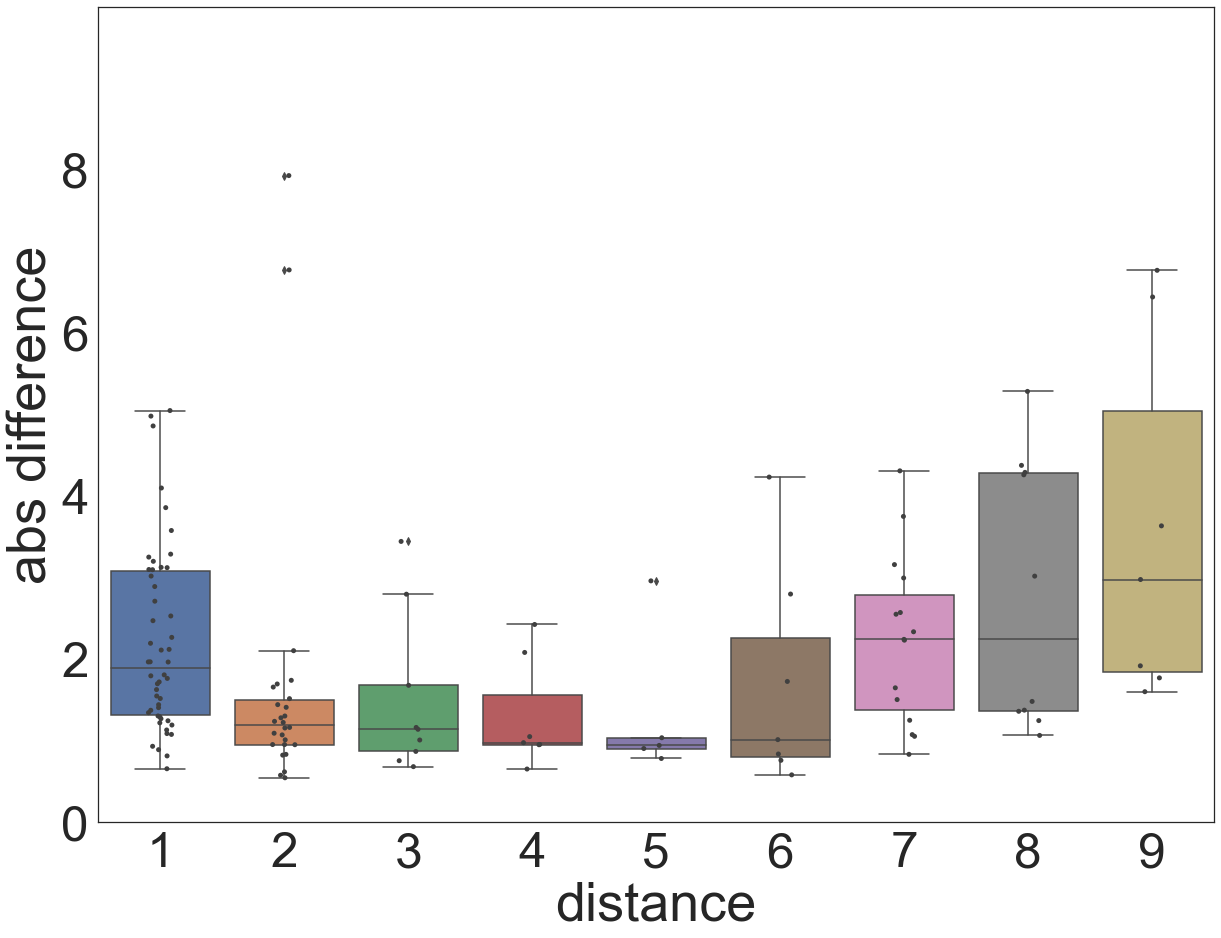

In [974]:
sns.set_style("white") 
sns.set(style="white", color_codes=True, font_scale=4.5)
a = sns.boxplot(x='distance', y= 'abs difference', data=sigoutputdf)
a = sns.stripplot(x='distance', y= 'abs difference', data=sigoutputdf,color=".25")
#a.set_yscale("log")
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.yticks([0,2,4,6,8, 10] , ["0",'2','4','6','8',''])
plt.savefig("rangeCCSinteractionsdistance_lstm_adam_final.svg")
plt.savefig("rangeCCSinteractionsdistance_lstm_adam_final.png")
plt.show()

In [975]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=sigoutputdf['abs difference'],
                          groups=sigoutputdf['Close'],
                          alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2  meandiff p-adj   lower   upper  reject
------------------------------------------------------
   Far     Near  -1.1392  0.001 -1.8465 -0.4319   True
   Far Neighbor  -0.5001 0.2282 -1.2178  0.2177  False
  Near Neighbor   0.6391 0.0426  0.0169  1.2614   True
------------------------------------------------------


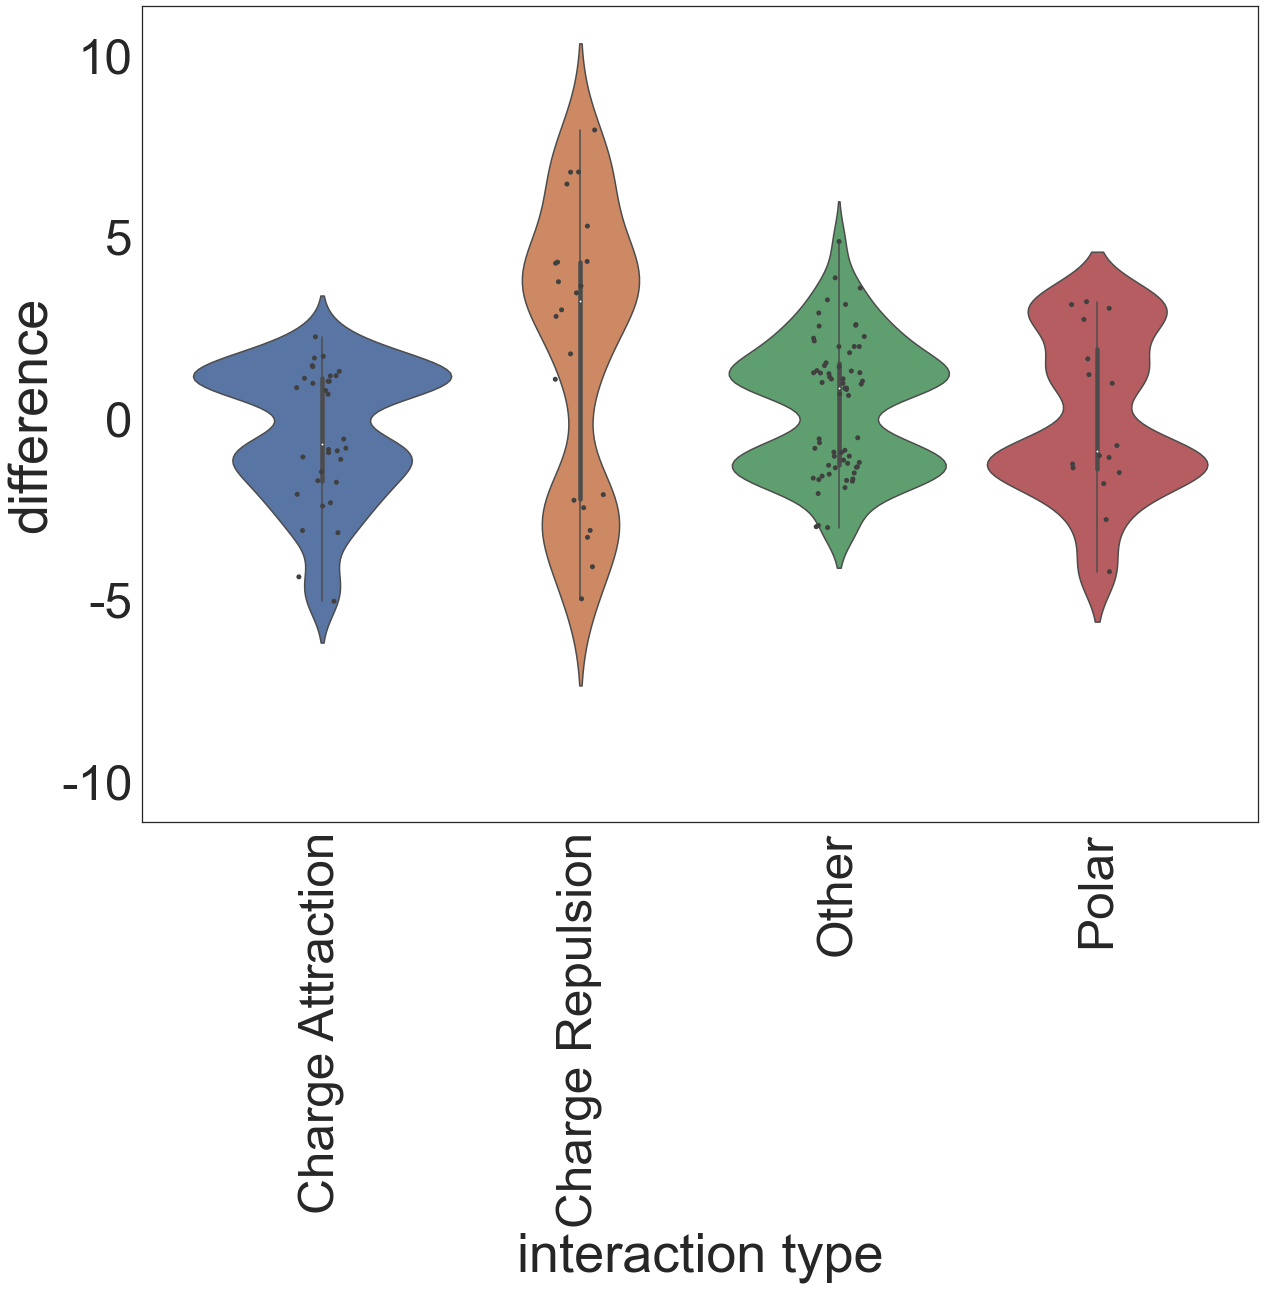

In [976]:

sigoutputdf = sigoutputdf.sort_values(by='interaction type')
sns.set(style="white", color_codes=True, font_scale=4.5)
a=sns.violinplot(x='interaction type', y= 'difference', data=sigoutputdf, width=1, bw=.3, scale_hue=True)
#a=sns.boxplot(x='combined', y= 'difference', data=sigoutputdf)
a = sns.stripplot(x='interaction type', y= 'difference', data=sigoutputdf,color=".25")
#a.set_yscale("log")
fig = plt.gcf()
fig.set_size_inches(20,15)
a.set_yticks([-10,-5,0,5,10,20])
a.set_yticklabels(["-10",'-5','0','5','10', '15'])
plt.yticks([-10,-5,0,5,10,15] , ["-10",'-5','0','5','10', '15'])
#plt.plot([0, 1], [0, 0], linewidth=2)
#plt.plot([0, 0], [15, 15], linewidth=0)
a.tick_params(axis='x', rotation=90)
plt.plot([0, 0], [-10.1, -10.1], linewidth=0)
plt.plot([0, 0], [10.1, 10.1], linewidth=0)
plt.savefig("CCSinteraction_lstm_adam_final.svg")
plt.savefig("CCSinteraction_lstm_adam_final.png")
plt.show()

In [977]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=sigoutputdf['difference'],
                          groups=sigoutputdf['interaction type'],
                          alpha=0.05)
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------
Charge Attraction Charge Repulsion   2.4488 0.0016  0.7376  4.1601   True
Charge Attraction            Other   0.8428 0.3562 -0.4882  2.1738  False
Charge Attraction            Polar    0.483    0.9 -1.4089  2.3749  False
 Charge Repulsion            Other   -1.606 0.0342 -3.1271 -0.0849   True
 Charge Repulsion            Polar  -1.9658 0.0615  -3.996  0.0643  False
            Other            Polar  -0.3598    0.9 -2.0816   1.362  False
-------------------------------------------------------------------------


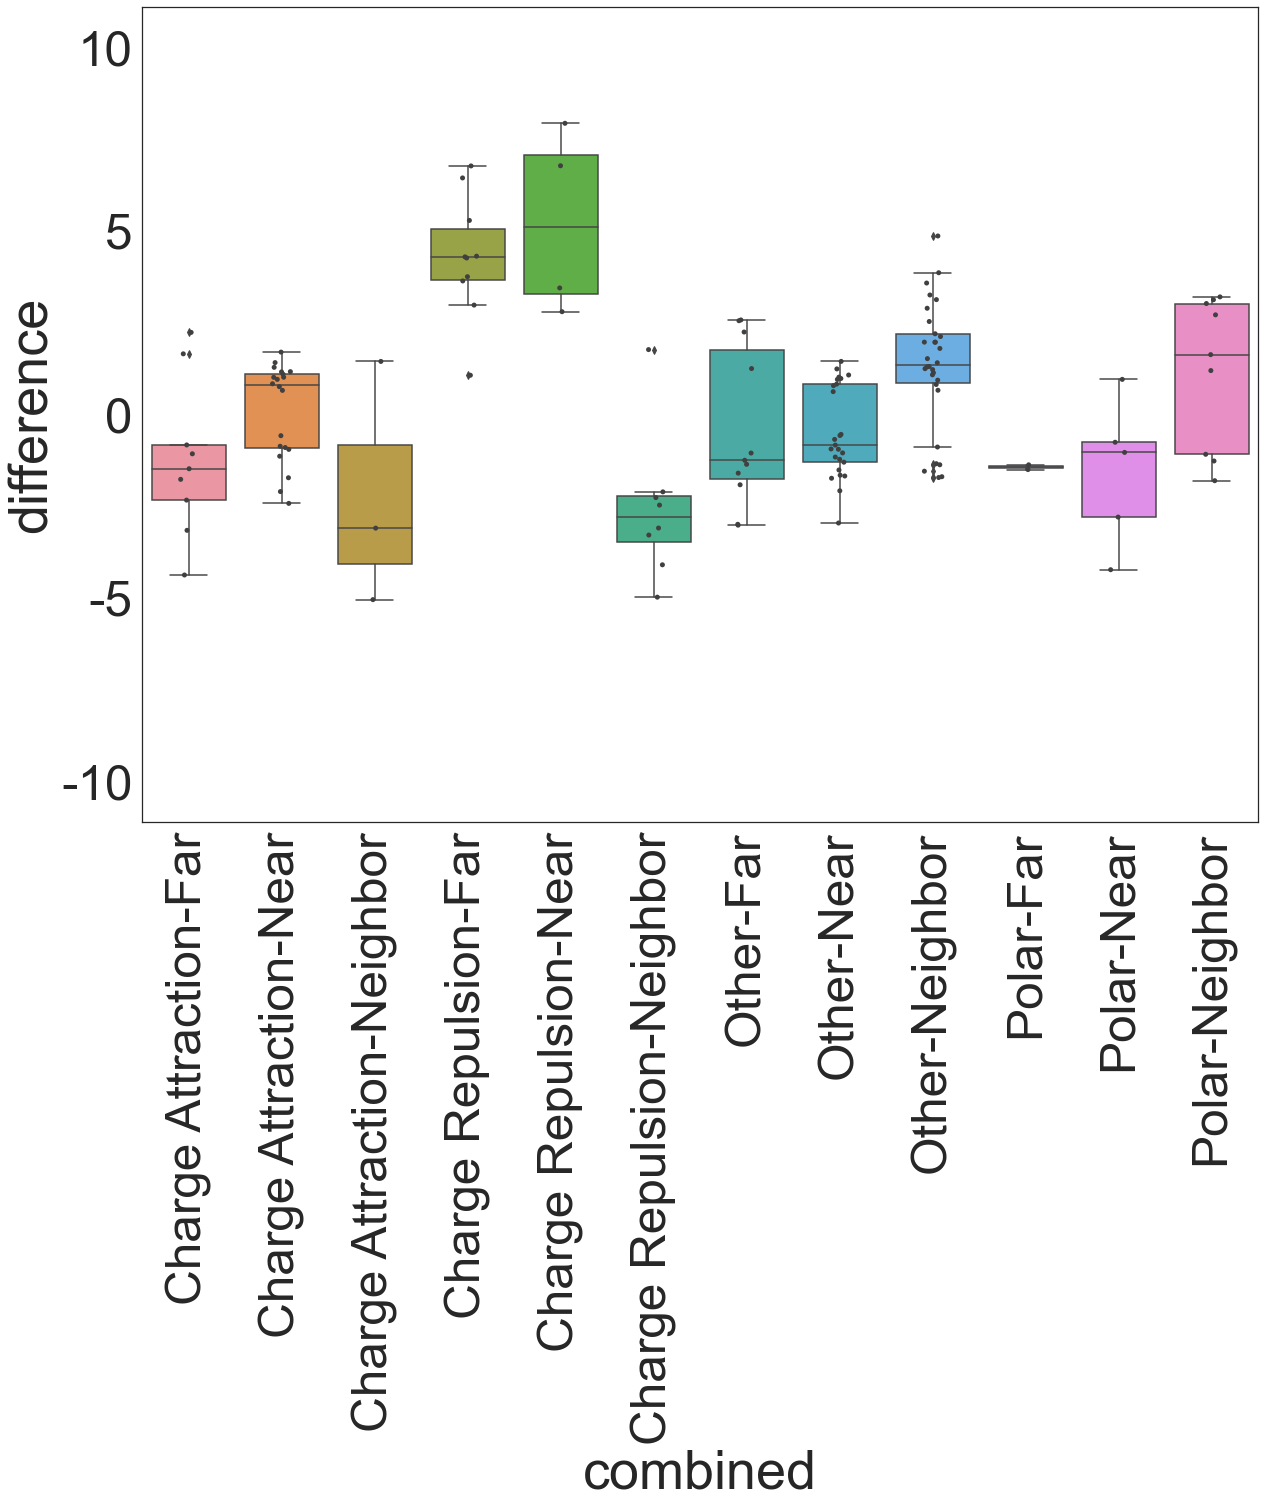

In [978]:

sigoutputdf = sigoutputdf.sort_values(by='combined')
sns.set(style="white", color_codes=True, font_scale=4.5)

a=sns.boxplot(x='combined', y= 'difference', data=sigoutputdf)
a = sns.stripplot(x='combined', y= 'difference', data=sigoutputdf,color=".25")
#a.set_yscale("log")
fig = plt.gcf()
fig.set_size_inches(20,15)
a.set_yticks([-10,-5,0,5,10,20])
a.set_yticklabels(["-10",'-5','0','5','10', '15'])
plt.yticks([-10,-5,0,5,10,15] , ["-10",'-5','0','5','10', '15'])
#plt.plot([0, 1], [0, 0], linewidth=2)
#plt.plot([0, 0], [15, 15], linewidth=0)
a.tick_params(axis='x', rotation=90)
plt.plot([0, 0], [-10.1, -10.1], linewidth=0)
plt.plot([0, 0], [10.1, 10.1], linewidth=0)
plt.savefig("CCScombined_lstm_adam_final.svg")
plt.savefig("CCScombined_lstm_adam_final.png")
plt.show()

In [870]:
sigoutputdf

,mw pvalue,corr mw pvalue,compared amino acid,compared position,position,amino acid,compared size,total size,compared mean,total mean,...,compared amino acid category,amino acid category,amino acid size,compared amino acid size,interaction type,interaction type category,combined,size type,size combined,size distance
67,2.059093e-08,5.130024e-04,R,1,8,E,24,363,-2.403677,-0.066929,...,Positive,Negative,Medium,Large,Charge Attraction,Attraction,Charge Attraction-Far,Large - Medium,Charge Attraction-Large - Medium,Far-Large - Medium
51,3.292551e-09,8.203062e-05,R,10,1,E,58,300,-5.783971,-4.012890,...,Positive,Negative,Medium,Large,Charge Attraction,Attraction,Charge Attraction-Far,Large - Medium,Charge Attraction-Large - Medium,Far-Large - Medium
131,1.754559e-06,4.371308e-02,R,9,1,E,60,298,-5.532671,-4.050309,...,Positive,Negative,Medium,Large,Charge Attraction,Attraction,Charge Attraction-Far,Large - Medium,Charge Attraction-Large - Medium,Far-Large - Medium
59,1.061372e-08,2.644303e-04,K,8,1,E,61,297,-2.937592,-4.586762,...,Positive,Negative,Medium,Large,Charge Attraction,Attraction,Charge Attraction-Far,Large - Medium,Charge Attraction-Large - Medium,Far-Large - Medium
52,3.416863e-09,8.512772e-05,H,1,8,E,18,369,-3.232611,-0.072110,...,Positive,Negative,Medium,Medium,Charge Attraction,Attraction,Charge Attraction-Far,Medium - Medium,Charge Attraction-Medium - Medium,Far-Medium - Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,4.708874e-08,1.173169e-03,Q,2,3,E,38,517,-1.318370,-2.511250,...,Polar,Negative,Medium,Medium,Polar,Attraction,Polar-Neighbor,Medium - Medium,Polar-Medium - Medium,Neighbor-Medium - Medium
128,1.551124e-06,3.864470e-02,Q,9,10,K,53,793,9.710512,10.981178,...,Polar,Positive,Large,Medium,Polar,Attraction,Polar-Neighbor,Large - Medium,Polar-Large - Medium,Neighbor-Large - Medium
9,3.580411e-14,8.920236e-10,T,1,2,E,24,390,-0.941186,-4.142012,...,Polar,Negative,Medium,Small,Polar,Attraction,Polar-Neighbor,Medium - Small,Polar-Medium - Small,Neighbor-Medium - Small
44,7.323258e-10,1.824517e-05,E,2,1,T,24,223,-6.262737,-9.282513,...,Negative,Polar,Small,Medium,Polar,Attraction,Polar-Neighbor,Medium - Small,Polar-Medium - Small,Neighbor-Medium - Small


In [871]:
testdf = pd.read_csv("test.csv")

In [872]:
testdf

,Starting B,Starting Peptide Count
0,5,8144
1,5,8064
2,5,8016
3,5,7890
4,5,7847
5,5,7867
6,10,8091
7,10,8100
8,10,8124
9,10,7881


In [979]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=testdf['Starting Peptide Count'],
                          groups=testdf['Starting B'],
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     5     10   59.6667 0.5034  -75.6306  194.9639  False
     5     15 -454.1667  0.001 -589.4639 -318.8694   True
    10     15 -513.8333  0.001 -649.1306 -378.5361   True
---------------------------------------------------------


In [980]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=sigoutputdf['difference'],
                          groups=sigoutputdf['combined'],
                          alpha=0.05)
print(tukey)

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                     group2           meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------------
     Charge Attraction-Far     Charge Attraction-Near   1.3548 0.7113  -0.9847  3.6942  False
     Charge Attraction-Far Charge Attraction-Neighbor  -0.9964    0.9  -4.8821  2.8892  False
     Charge Attraction-Far       Charge Repulsion-Far   5.5183  0.001   2.8403  8.1963   True
     Charge Attraction-Far      Charge Repulsion-Near   6.4763  0.001   2.9738  9.9788   True
     Charge Attraction-Far  Charge Repulsion-Neighbor  -1.3302    0.9  -4.1623   1.502  False
     Charge Attraction-Far                  Other-Far   0.8223    0.9  -1.7974   3.442  False
     Charge Attraction-Far                 Other-Near   0.7594    0.9  -1.5063  3.0251  False
     Charge Attraction-Far             Other-Neighbor   2.57

In [981]:
pvalueheat = pd.read_csv("pvalueheatmap.csv", index_col=0)

In [578]:
pvalueheat

,Attraction-Far,Attraction-Near,Attraction-Neighbor,Repulsion-Far,Repulsion-Near,Repulsion-Neighbor,Other-Far,Other-Near,Other-Neighbor,Polar-Near,Polar-Neighbor,Polar-Far
Attraction-Far,1.0000,0.6925,0.9000,0.0010,0.0010,0.9000,0.9000,0.9000,0.0027,0.9000,0.9000,0.1242
Attraction-Near,0.6925,1.0000,0.5425,0.0010,0.0010,0.0149,0.9000,0.9000,0.1799,0.9000,0.6902,0.9000
Attraction-Neighbor,0.9000,0.5425,1.0000,0.0010,0.0010,0.9000,0.8995,0.8706,0.0216,0.9000,0.9000,0.1257
Repulsion-Far,0.0010,0.0010,0.0010,1.0000,0.9000,0.0010,0.0010,0.0010,0.0019,0.0021,0.0010,0.0082
Repulsion-Near,0.0010,0.0010,0.0010,0.9000,1.0000,0.0010,0.0010,0.0010,0.0056,0.0010,0.0010,0.0080
Repulsion-Neighbor,0.9000,0.0149,0.9000,0.0010,0.0010,1.0000,0.2440,0.1250,0.0010,0.9000,0.9000,0.0010
Other-Far,0.9000,0.9000,0.8995,0.0010,0.0010,0.2440,1.0000,0.9000,0.0729,0.9000,0.9000,0.6215
Other-Near,0.9000,0.9000,0.8706,0.0010,0.0010,0.1250,0.9000,1.0000,0.0022,0.9000,0.9000,0.3548
Other-Neighbor,0.0027,0.1799,0.0216,0.0019,0.0056,0.0010,0.0729,0.0022,1.0000,0.4401,0.0148,0.9000
Polar-Near,0.9000,0.9000,0.9000,0.0021,0.0010,0.9000,0.9000,0.9000,0.4401,1.0000,0.9000,0.6963


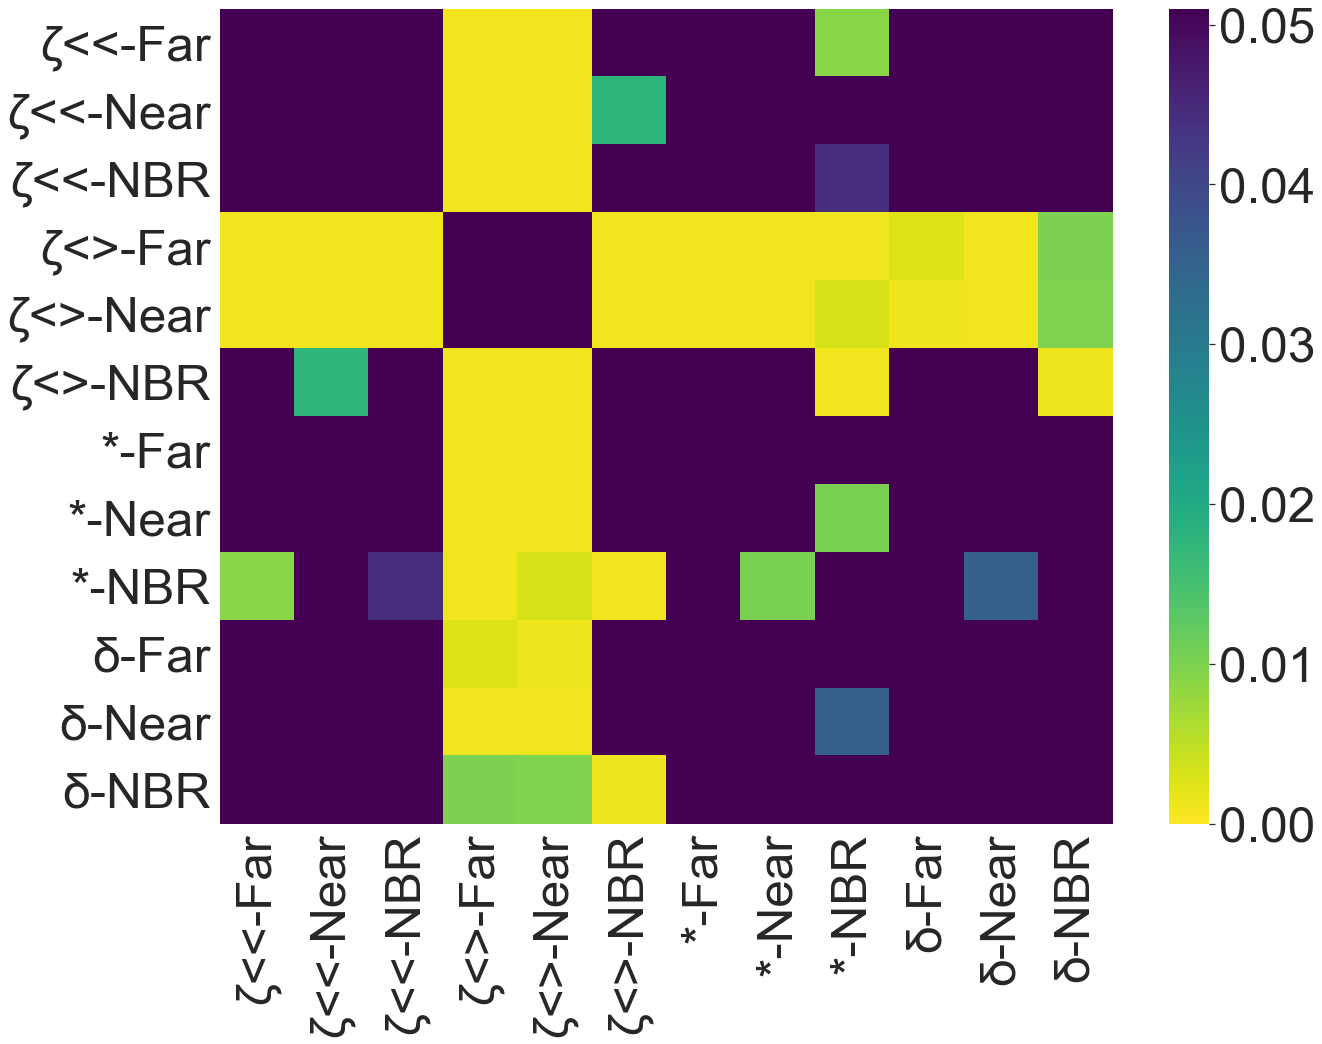

In [987]:
a = sns.heatmap(pvalueheat, vmin=0, vmax=0.051, cmap="viridis_r")
fig = plt.gcf()
fig.set_size_inches(20,15)

#a.set_yticklabels(['Attraction-Far','Attraction-Near','Attraction-Neighbor','Repulsion-Far','Repulsion-Near','Repulsion-Neighbor','Other-Far','Other-Near','Other-Neighbor','Polar-Near','Polar-Neighbor','Polar-Far'
#])
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5] ,['ζ<<-Far','ζ<<-Near','ζ<<-NBR','ζ<>-Far','ζ<>-Near','ζ<>-NBR','*-Far','*-Near','*-NBR','δ-Far','δ-Near','δ-NBR'])
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5] , ['ζ<<-Far','ζ<<-Near','ζ<<-NBR','ζ<>-Far','ζ<>-Near','ζ<>-NBR','*-Far','*-Near','*-NBR','δ-Far','δ-Near','δ-NBR'])
#plt.plot([0, 1], [0, 0], linewidth=2)
#plt.plot([0, 0], [15, 15], linewidth=0)
a.tick_params(axis='x', rotation=90)
plt.plot([0, 0], [-10.1, -10.1], linewidth=0)
plt.plot([0, 0], [10.1, 10.1], linewidth=0)
plt.savefig("CCScombined_pvalueheatmap_final.svg")
plt.savefig("CCScombined_pvalueheatmap.png")

In [414]:

difference = outputdf['difference'].tolist()
inttype = outputdf['interaction type'].tolist()
category = outputdf['interaction type category'].tolist()

attraction = []
repulsion = []
hydrophobic = []
other = []
polar = []

allattract = []
allrepulse = []

i = 0

while i < len(inttype):
    if inttype[i] == "Charge Attraction":
        attraction.append(difference[i])
    if inttype[i] == "Charge Repulsion":
        repulsion.append(difference[i])
    if inttype[i] == "Hydrophobic":
        hydrophobic.append(difference[i])
    if inttype[i] == "Polar":
        polar.append(difference[i])
    if inttype[i] == "Other":
        other.append(difference[i])
    if category[i] == "Attraction":
        allattract.append(difference[i])
    if category[i] == "Repulsive":
        allrepulse.append(difference[i])
    i+=1
attractionpos = []
attractionneg = []    
for value in attraction:
    if value > 0:
        attractionpos.append(value)
    if value < 0:
        attractionneg.append(abs(value))

    
    
stat,test = scipy.stats.mannwhitneyu(attractionpos, attractionneg)
print (test)


repulsionpos = []
repulsionneg = []    
for value in repulsion:
    if value > 0:
        repulsionpos.append(value)
    if value < 0:
        repulsionneg.append(abs(value))

    
    
stat,test = scipy.stats.mannwhitneyu(repulsionpos, repulsionneg)
print (test)


hydropos = []
hydroneg = []    
for value in hydrophobic:
    if value > 0:
        hydropos.append(value)
    if value < 0:
        hydroneg.append(abs(value))

    
    
stat,test = scipy.stats.mannwhitneyu(hydropos, hydroneg)
print (test)

polarpos = []
polarneg = []    
for value in polar:
    if value > 0:
        polarpos.append(value)
    if value < 0:
        polarneg.append(abs(value))

    
    
stat,test = scipy.stats.mannwhitneyu(polarpos, polarneg)
print (test)

otherpos = []
otherneg = []    
for value in other:
    if value > 0:
        otherpos.append(value)
    if value < 0:
        otherneg.append(abs(value))

    
    
stat,test = scipy.stats.mannwhitneyu(otherpos, otherneg)
print (test)

allattractpos = []
allattractneg = []

for value in allattract:
    if value > 0:
        allattractpos.append(value)
    if value < 0:
        allattractneg.append(abs(value))

    
    
stat,test = scipy.stats.mannwhitneyu(allattractpos, allattractneg)
print (test)

allrepulsepos = []
allrepulseneg = []

for value in allrepulse:
    if value > 0:
        allrepulsepos.append(value)
    if value < 0:
        allrepulseneg.append(abs(value))

    
    
stat,test = scipy.stats.mannwhitneyu(allrepulsepos, allrepulseneg)
print (test)

print(len(allrepulsepos))
print(len(allrepulseneg))

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------
Charge Attraction Charge Repulsion   0.2808  0.001  0.1209  0.4408   True
Charge Attraction      Hydrophobic   0.0861 0.2969 -0.0318  0.2039  False
Charge Attraction            Other   0.1021 0.0882 -0.0082  0.2125  False
Charge Attraction            Polar   0.0552 0.7242 -0.0606  0.1711  False
Charge Attraction             zEnd   0.2492  0.001  0.0872  0.4112   True
 Charge Repulsion      Hydrophobic  -0.1948  0.001 -0.3231 -0.0664   True
 Charge Repulsion            Other  -0.1787  0.001 -0.3002 -0.0572   True
 Charge Repulsion            Polar  -0.2256  0.001 -0.3521 -0.0991   True
 Charge Repulsion             zEnd  -0.0316    0.9 -0.2014  0.1382  False
      Hydrophobic            Other   0.0161    0.9 -0.0394  0.0715  False
      Hydrophobic            Polar  -0

NameError: name 'scipy' is not defined

In [ ]:
sigoutputdf['difference']
a = sigoutputdf.loc[sigoutputdf['interaction type category'] == 'Attraction', 'difference']

b = sigoutputdf.loc[sigoutputdf['interaction type category'] == 'Repulsive', 'difference']
print (np.mean(a.tolist()))
print (np.mean(b.tolist()))
stat,test = st.ttest_ind(a.tolist(), b.tolist())
stat,test = scipy.stats.mannwhitneyu(a.tolist(), b.tolist())

print (test)

In [380]:
sigoutputdf.to_csv('sigoutputdf_ccsdepanalysisfinal_modified.csv',index=False)

1.5261808591438228
20.135110782996097


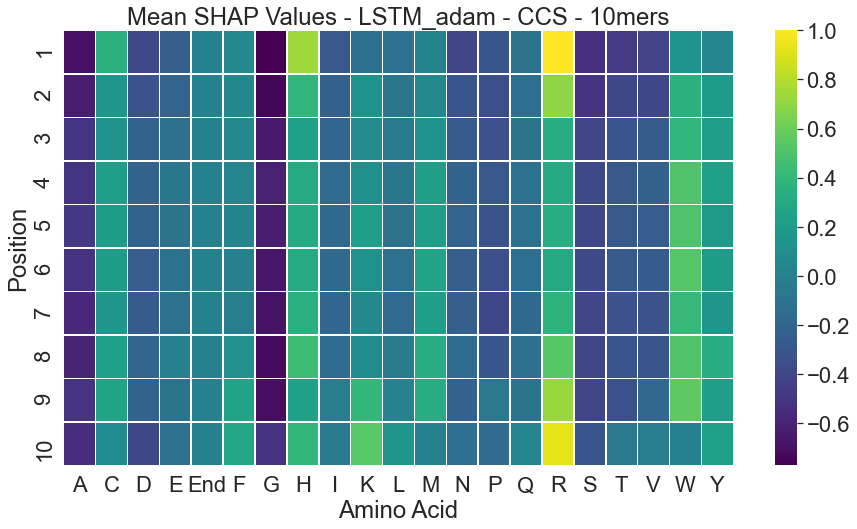

In [965]:
#Create Mean Heatmaps for CCS

import seaborn as sns; sns.set_theme()
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl

#Change these three to match correct values




#x_testsubset = x_test
#shap_valuestmp = shap_values
#shap_values = shap_values

x_testsubset = tenmers[0]
shap_valuestmp = [tenmers[1][0]]
shap_values = [tenmers[1][0]]


    
x = 0
    
    
char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

x_testpep = []
temppep = []
i = 0

while i < len(x_testsubset):
       
    j = 0
    while j < len(x_test[i]):
        #print(x_testsubset[i][j])
        #temppep.append(str(char_index[int(x_testsubset[i][j])] + " " + str(j+1)))
        temppep.append(str(char_index[int(x_testsubset[i][j])] + " " + str(j+1)))
        j+=1
    x_testpep.append(temppep)
    temppep = []
    i+=1


while x < 1:
    aa = []

            
    i = 0
    while i < 10:
        aa.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
        i+=1

    char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    #create 3D array to keep track of amino acid position shap values
    #Change shap values index for each allele 0 = A001 1 = A002 2 = A008 3 = B008 4 = B017
    i = 0
    
    while i < len(x_testsubset):
        j=0

        while j < len(x_testsubset[i]):
            
            while True:
                try:
                    
                    
                    aa[j][int(x_testsubset[i][j])].append(shap_valuestmp[x][i][j])
                    break
                except IndexError:
                    print('j=' + str(j))
                    print('i=' + str(i))
                    print('x=' + str(x))
                    print('len of aa =' + str(len(aa)))
                    print('len of aa[j] =' + str(len(aa[0])))
                    print('len of x_testsubset' + str(len(x_testsubset)))
                    print('len of x_testsubset[i]' + str(len(x_testsubset[i])))
                    print('len of shap' + str(len(shap_valuestmp)))
                    print('len of shap[x]' + str(len(shap_valuestmp[x])))
                    print('shap[x]' + str(shap_valuestmp[x]))
                    print('len of shap[x][i]' + str(len(shap_valuestmp[x][i])))
              
            #print(str(i)+ " " + str(j) + " " + str(len(x_testsubset))+ " " + str(len(x_testsubset[i]))+ " " + str(x_testsubset[i][j]))
            
            j+=1
        i+=1  
    heatmap = []
    i = 0
    while i < len(aa):
        j=0
        heatmap.append([])
        while j < len(aa[i]):
            if len(aa[i][j]) > 1:
                
                
                #remove extra zeros
                if len(aa[i][j])>1:
                    aa[i][j] = aa[i][j][1:]
                #mean
                heatmap[i].append((sum(aa[i][j])/float(len(aa[i][j]))))
               
            else:
                heatmap[i].append(0)

                #print(char_index[j] + str(i+1) + ": ")
                #print ("0")
            j+=1
        i+=1
    
    
    heatmap = np.array(heatmap)#*weight
    print(heatmap[9][1])
    print(abs(heatmap).max())
    heatmap = heatmap/(abs(heatmap).max())
    
    plt.figure()
    x_axis_labels = ['A','C','D','E','End','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'] # labels for x-axis
    y_axis_labels = ['1','2','3','4','5','6','7','8','9','10']
    sns.set(font_scale=2)

    # figure size in inches
    rcParams['figure.figsize'] = 15,8

    ax = sns.heatmap(heatmap,xticklabels=x_axis_labels, yticklabels=y_axis_labels,linewidths=.5,  
                     #vmin=-1, 
                     #vmax=1, 
                     cmap="viridis")


    ax.set(xlabel='Amino Acid', ylabel='Position', title='Mean SHAP Values - LSTM_adam - CCS - 10mers')
    ax.figure.savefig('ccsallmers_lstm_adam_final_10mers.png')
    ax.figure.savefig('ccsallmers_lstm_adam_final_10mers.svg')
    plt.show()
    x+=1

In [938]:
for value in heatmap:
    print(value)

[-0.  0. -0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0.  0.]
[-0.  0. -0. -0.  0.  0. -0.  0. -0. nan -0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0.  0.]
[-0.  0. -0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0.  0.]
[-0.  0. -0. -0.  0.  0. -0.  0. -0. nan -0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0.  0.]
[-0.  0. -0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0.  0.]
[-0.  0. -0. -0.  0.  0. -0.  0. -0. nan -0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0.  0.]
[-0.  0. -0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0.  0.]
[-0.  0. -0. -0.  0.  0. -0.  0. -0.  0.  0.  0. -0. nan -0.  0. -0. -0.
 -0.  0.  0.]
[ 0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]
[ 0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]


In [927]:
len(shap_values[0])

1042

In [929]:
shap_values[0][0:100]

[array([-1.83041559e+00, -1.67266715e-01, -6.85939680e+00, -3.84251028e-01,
         6.32493696e+00, -1.95861768e+00, -1.94756778e-02,  1.00755318e+01,
        -1.55710548e+01, -1.99016723e+01]),
 array([ -5.53395814,  -1.23480112,  -5.35442626,  -1.52717206,
         -1.80472947,  -2.17511031,  -5.04612222,   8.35947079,
        -16.87318144, -20.25582633]),
 array([  1.77518395,  -2.81795011,  -1.76804584,  -2.55178875,
         -0.44055809,  -2.18484879,  -1.73272793,   3.59252309,
        -16.75221832, -19.69701757]),
 array([ -2.06012293,   8.36364078,  -3.24466739,  -2.60973813,
          2.44887959,  -1.39921623,  -7.18751373,   1.83553357,
        -16.40447534, -20.21930468]),
 array([ -1.75223989,   8.67152083,  -5.84946492,  -4.2464091 ,
         -0.96457973,  -1.00209472,  -6.12044235,   2.98591095,
        -16.83003887, -20.41339719]),
 array([-13.68364933,   1.6097104 ,  -6.40411606,  -6.82236149,
         -9.46690648,   3.43719668,  -7.56332279,  11.80987465,
        -17.

In [928]:
len(x_test)

1042

In [777]:
weight[0][0]


0.051880243858272466

In [778]:
heatmap[0][0]

nan

In [781]:
i = 0
while i < len(weight):
    j = 0
    while j < len(weight[i]):
        if weight[i][j] == 0:
            weight[i][j] = 1
        j+=1
    i+=1